In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Index2018.csv to Index2018 (1).csv


In [ ]:
raw_csv_data = pd.read_csv("Index2018 (1).csv")

In [ ]:
raw_csv_data

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


## EDA & Data Preparation

In [ ]:
df_comp = raw_csv_data

In [ ]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [ ]:
#check NA values
df_comp.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [ ]:
#check NA values
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Initial Visualization

<function matplotlib.pyplot.show(*args, **kw)>

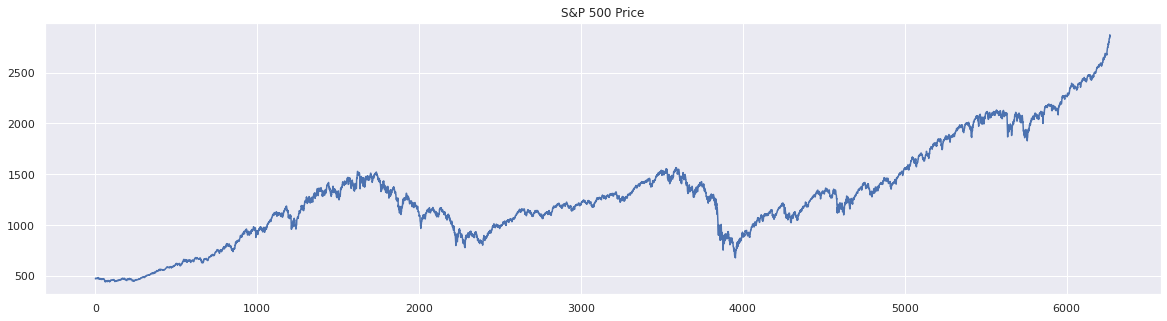

In [ ]:
df_comp.spx.plot(figsize=(20,5), title='S&P 500 Price')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

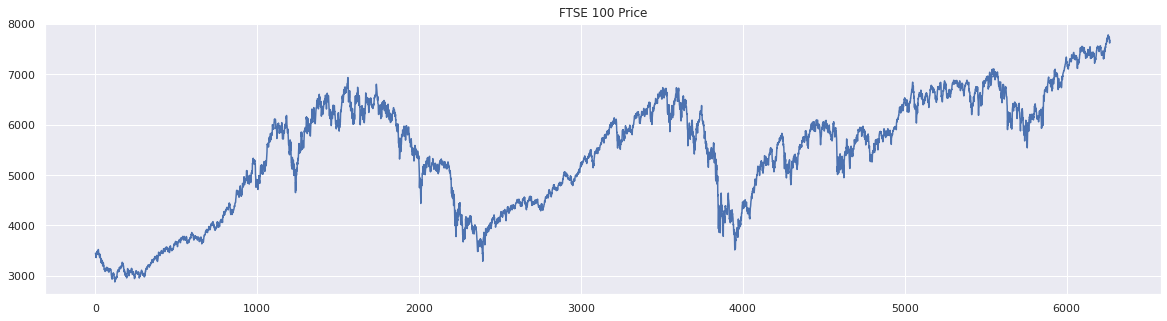

In [ ]:
df_comp.ftse.plot(figsize=(20,5), title='FTSE 100 Price')
plt.show

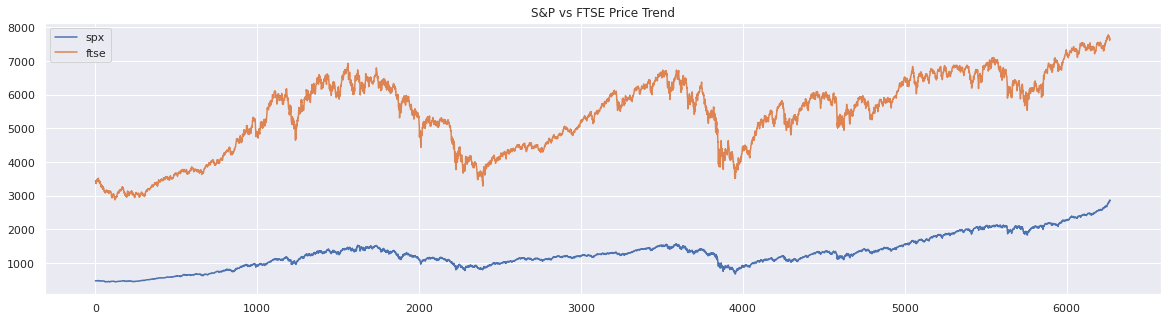

In [ ]:
df_comp.spx.plot(figsize=(20,5))
df_comp.ftse.plot(figsize=(20,5))
plt.title('S&P vs FTSE Price Trend')
plt.legend()
plt.show()

## Probability Plot

In [ ]:
import scipy.stats
import pylab

<function matplotlib.pyplot.show(*args, **kw)>

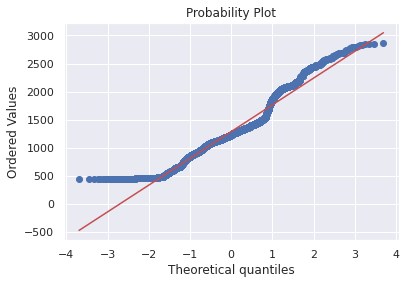

In [ ]:
scipy.stats.probplot(df_comp.spx, plot=pylab)
pylab.show

> Insight: S&P does not follow a normal distribution time series

### Trimming Data

In [ ]:
#convert date values to date
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.900000,2224.95,3445.980000,18124.01
1,1994-01-10,475.270000,2225.00,3440.580000,18443.44
2,1994-01-11,474.130000,2228.10,3413.770000,18485.25
3,1994-01-12,474.170000,2182.06,3372.020000,18793.88
4,1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,2018-01-23,2839.130362,13559.60,7731.827774,24124.15
6265,2018-01-24,2837.544008,13414.74,7643.428966,23940.78
6266,2018-01-25,2839.253031,13298.36,7615.839954,23669.49
6267,2018-01-26,2872.867839,13340.17,7665.541292,23631.88


In [ ]:
df_comp.date.describe()

<ipython-input-113-68f1cb45f47c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [ ]:
#replace the first column with date
df_comp.set_index("date", inplace=True)
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Set a desirable date frequency for time analysis

In [ ]:
#exclude weekends and holidays to align with business days
df_comp = df_comp.asfreq("b")
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
#check dates missing price reporting
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [ ]:
#filll the missing values
##Forward filling was chosen and back filling

df_comp.spx = df_comp.spx.fillna("ffill")
df_comp.dax = df_comp.dax.fillna("ffill")
df_comp.ftse = df_comp.ftse.fillna("ffill")
df_comp.nikkei = df_comp.nikkei.fillna("ffill")

In [ ]:
#df_comp.spx = df_comp.spx.fillna(value = df_comp.spx.mean())
#df_comp.ftse = df_comp.ftse.fillna(value = df_comp.ftse.mean())

In [ ]:
#check dates missing price reporting
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [ ]:
df_comp['market_value']=df_comp.spx

In [ ]:
#drop other price values
del df_comp['dax'], df_comp['spx'], df_comp['ftse'], df_comp['nikkei']

In [ ]:
df_comp

,market_value
date,
1994-01-07,469.9
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


## Train and Test Datasets

split the df_comp into train (80%) and test (20%) dataset

In [ ]:
size = int(len(df_comp)*0.8)

In [ ]:
size

5021

In [ ]:
df = df_comp.iloc[:size]        #train set
df_test = df_comp.iloc[size:]   #test set

In [ ]:
df.shape[0]

5021

In [ ]:
df_test.shape[0]

1256

In [ ]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.27893


In [ ]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


> two data sets are consecutive